<hr>
<br><br><br>
<div align=center>
<font size=2>
        Trabalho de Conclusão de Curso
    </font>
    <br><br><BR>
    <font size=3>
        Classificação de sentimento em arquivos de áudio<br>a partir da extração de Coeficientes Cepstrais na frequência Mel<br>(MFCCs)
    </font>
    <br><br><BR>
    <font size=2>
        ICMC-USP
    </font>    
</div>
<br><br><br>
<hr>

<br><br>
<a id=menu></a>

[Biblotecas](#libs) <br>
[Dados](#data) <br>
[Pré-processamento](#prep) <br>
[Processamento](#proc) <br>
[Avaliação](#aval) <br>

<br>

<a id='libs'></a>
<h3>Bibliotecas</h3>
<br>
<blockquote>
    <dl>
        <dl>- keras: interface para desenvolvimento de redes neurais.</dl>
        <dl>- librosa: múltiplas funcionalidades para tratamento de arquivos de áudio.</dl>
        <dl>- Matplotlib: criação de gráficos e visuadlzação de dados.</dl>
        <dl>- Numpy: processamento de vetores e matrizes multimensionais.</dl>
        <dl>- Pandas: manipulação e análise de dados tabulares e séries temporais</dl>
        <dl>- Seaborn: criação de gráficos e visualização de dados.</dl>
        <dl>- Sklearn: algoritmos de aprendizado de máquina.</dl>
        <dl>- TensorFlow: desenho de fluxos e processamento de tensores para aprendizado de máquina.</dl>
    </dl>
</blockquote>


In [1]:
import numpy as np 
import pandas as pd 

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt 
import seaborn as sns



<br>
<a id='proc'></a>
<h3>Processamento</h3>

<font size=1>[menu](#menu)</font>

In [3]:
# df.to_csv('../data/voice_features.csv', index=False)
df = pd.read_csv('../data/voice_features_normalized_by_group.csv')
print(df.shape)

(1440, 182)


In [3]:
# Test just with MEL features
df = pd.concat([df.iloc[:,41:169],df.iloc[:,-8:]], axis=1)
df = df[df.emotion!='neutral']
print(df.shape)
df.head(2)

(1344, 136)


,41,42,43,44,45,46,47,48,49,50,...,167,168,174,175,176,177,178,179,180,emotion
0,0.000092,0.000151,0.000136,0.000907,0.015207,0.042250,0.256988,0.517432,0.130183,0.119377,...,0.000067,0.555700,0.539773,0.53951,0.592600,0.604869,0.615869,0.599911,3000.496656,angry
1,0.000039,0.000053,0.000065,0.000392,0.004423,0.041761,0.167385,0.292937,0.688341,0.518451,...,0.000035,0.550358,0.406826,0.42590,0.472114,0.543731,0.561210,0.558470,2674.064395,fearful


In [4]:
from pycaret.classification import *

In [5]:
clf = setup(df,
            target='emotion',
            train_size=0.8, 
            # normalize=True, 
            # transform_target=True,
            # feature_interaction=True,
            # feature_ratio=True,
            session_id=42)

,Description,Value
0,session_id,42
1,Target,emotion
2,Target Type,Multiclass
3,Label Encoded,"angry: 0, calm: 1, disgust: 2, fearful: 3, happy: 4, neutral: 5, sad: 6, surprised: 7"
4,Original Data,"(1440, 182)"
5,Missing Values,False
6,Numeric Features,181
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
get_config('X').head(3)

,0,1,2,3,4,5,6,7,8,9,...,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,0.3
0,0.562565,0.384037,0.621812,0.431466,0.301129,0.464524,0.444735,0.438099,0.390474,0.417503,...,0.438458,0.384390,0.489953,0.438796,0.406293,0.463329,0.452571,0.498538,0.404362,0.590987
1,0.546871,0.417574,0.596210,0.461148,0.468564,0.387311,0.296866,0.349285,0.494042,0.463705,...,0.210113,0.096817,0.096021,0.179112,0.182291,0.210175,0.308362,0.363440,0.295259,0.437237
2,0.841152,0.238125,0.344393,0.391005,0.304944,0.226162,0.309806,0.382478,0.470580,0.433959,...,0.164653,0.065011,0.213908,0.412788,0.497863,0.575649,0.664687,0.723605,0.711539,0.744679


In [7]:
top3 = compare_models(sort='AUC', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6051,0.9151,0.5869,0.6114,0.5993,0.5458,0.5480,2.3860
et,Extra Trees Classifier,0.5678,0.8790,0.5485,0.5810,0.5571,0.5027,0.5068,0.1280
gbc,Gradient Boosting Classifier,0.5000,0.8734,0.4848,0.5107,0.4956,0.4249,0.4272,9.6140
rf,Random Forest Classifier,0.5356,0.8669,0.5194,0.5475,0.5258,0.4659,0.4696,0.2260
knn,K Neighbors Classifier,0.4835,0.8444,0.4696,0.4921,0.4756,0.4077,0.4104,0.0300
lr,Logistic Regression,0.4687,0.8355,0.4437,0.4635,0.4506,0.3873,0.3918,0.4520
lda,Linear Discriminant Analysis,0.4313,0.7994,0.4242,0.4532,0.4230,0.3478,0.3511,0.0220
nb,Naive Bayes,0.2717,0.7073,0.2720,0.2870,0.2455,0.1685,0.1757,0.0160
ada,Ada Boost Classifier,0.2579,0.6574,0.2536,0.2086,0.2078,0.1501,0.1570,0.2710
dt,Decision Tree Classifier,0.3551,0.6294,0.3501,0.3583,0.3523,0.2589,0.2599,0.0450


In [26]:
tuned_top3 = [tune_model(i) for i in top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3663,0.7867,0.3448,0.3303,0.3385,0.2696,0.2733
1,0.4554,0.8512,0.4327,0.4638,0.4231,0.3732,0.3848
2,0.4059,0.8169,0.3853,0.3721,0.3635,0.3153,0.3248
3,0.4356,0.8062,0.4141,0.4096,0.4055,0.3496,0.3556
4,0.4851,0.8367,0.4547,0.4608,0.4559,0.4059,0.4124
5,0.3663,0.7999,0.3407,0.3498,0.3457,0.2679,0.2719
6,0.4257,0.8122,0.4089,0.4780,0.4126,0.3370,0.3432
7,0.4900,0.8511,0.4609,0.4468,0.4428,0.4114,0.4220
8,0.4300,0.8366,0.4038,0.4167,0.4065,0.3421,0.3490
9,0.4300,0.7837,0.4114,0.4650,0.4064,0.3427,0.3489


In [27]:
blender = blend_models(tuned_top3)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4950,0.8387,0.4739,0.4922,0.4887,0.4190,0.4205
1,0.5347,0.8756,0.5130,0.5845,0.5294,0.4638,0.4677
2,0.5149,0.8470,0.5048,0.5136,0.5021,0.4422,0.4455
3,0.4950,0.8447,0.4691,0.4932,0.4708,0.4190,0.4250
4,0.4455,0.8437,0.4169,0.4069,0.4154,0.3597,0.3636
5,0.4059,0.8269,0.3764,0.3948,0.3872,0.3146,0.3188
6,0.4950,0.8438,0.4938,0.5002,0.4822,0.4184,0.4221
7,0.5600,0.8868,0.5508,0.5730,0.5428,0.4935,0.4988
8,0.5400,0.8843,0.5172,0.5413,0.5350,0.4704,0.4717
9,0.4800,0.8069,0.4588,0.5117,0.4603,0.4006,0.4051


In [11]:
stacker = stack_models(tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2447,0.5936,0.2513,0.2366,0.2373,0.1191,0.1195
1,0.2340,0.5464,0.2344,0.2424,0.2273,0.1051,0.1067
2,0.2979,0.6110,0.3038,0.3076,0.2934,0.1816,0.1834
3,0.2553,0.5944,0.2592,0.2459,0.2420,0.1320,0.1334
4,0.2447,0.5519,0.2429,0.2547,0.2460,0.1187,0.1194
5,0.2872,0.6187,0.2911,0.2680,0.2724,0.1691,0.1703
6,0.2766,0.5702,0.2763,0.2707,0.2701,0.1559,0.1566
7,0.2553,0.5631,0.2543,0.2659,0.2511,0.1309,0.1318
8,0.2872,0.6010,0.2855,0.2783,0.2756,0.1676,0.1698
9,0.2128,0.5611,0.2139,0.2291,0.2114,0.0837,0.0849


In [12]:
model = automl(optimize = 'AUC')

In [8]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6121,0.9222,0.5839,0.6124,0.6073,0.5543,0.5556
1,0.5776,0.8992,0.5565,0.5961,0.5816,0.5140,0.5153
2,0.5739,0.9178,0.5547,0.5947,0.5670,0.5087,0.5108
3,0.6261,0.9007,0.6143,0.6399,0.6264,0.5700,0.5718
4,0.5826,0.9105,0.5633,0.5890,0.5806,0.5194,0.5205
5,0.5913,0.9285,0.5635,0.5931,0.5783,0.5296,0.5339
6,0.5913,0.8990,0.5786,0.5955,0.5858,0.5305,0.5325
7,0.6870,0.9324,0.6771,0.6907,0.6840,0.6407,0.6421
8,0.6348,0.9375,0.6057,0.6348,0.6231,0.5805,0.5832
9,0.5739,0.9028,0.5708,0.5672,0.5591,0.5106,0.5138


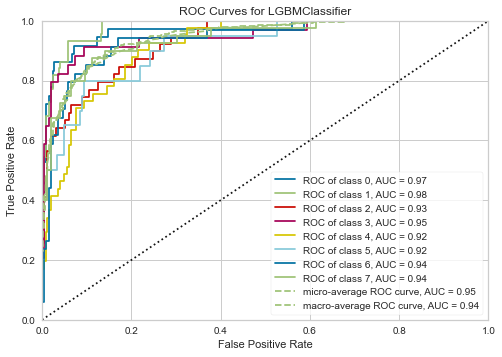

In [15]:
plot_model(model)

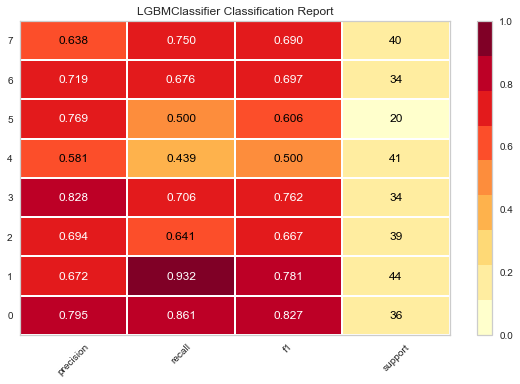

In [16]:
plot_model(model, 'class_report')

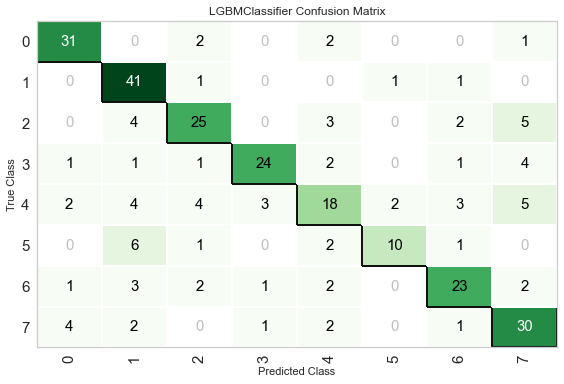

In [17]:
plot_model(model, 'confusion_matrix')

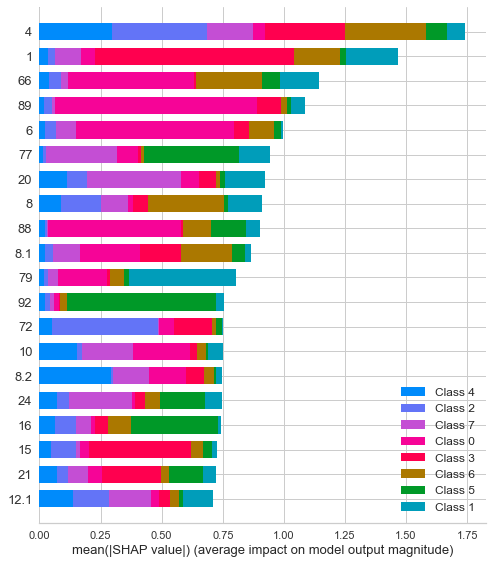

In [18]:
interpret_model(model)

In [10]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7014,0.9441,0.6882,0.7034,0.6942,0.6558,0.6583


In [11]:
finalize_model(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
save_model(model, '../model/voice_emotion_model')
# model = load_model('../model/voice_emotion_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='emotion',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,

<hr>
<br><br>
<div align=right>
    <font size=2>
        Julio Valim &emsp;
    </font>
    <br>
    <font size=1>
        <a href='https://www.linkedin.com/in/juliovalim'>contato /in</a>&emsp;&emsp;
    </font>
</div>